In [223]:
import os
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [224]:
df = pd.read_parquet(os.path.join('data','jizdenky.parquet'))

In [225]:
df = df[df['odkud'].str.contains('Ostrava') | df['odkud'].str.contains('Praha')]
df = df[df['kam'].str.contains('Ostrava') | df['kam'].str.contains('Praha')]

In [226]:
df = df[df['prostredek'] != 'autobus']

In [227]:
df = df[df['predstih_d'] >= 0]

In [228]:
df = df[df['prestupy'] == 0]

In [229]:
df['vzdalenost'].quantile([0.1,0.25,0.5,0.75,0.666,0.8,0.9,0.95])

0.100    351.0
0.250    356.0
0.500    356.0
0.750    356.0
0.666    356.0
0.800    356.0
0.900    356.0
0.950    356.0
Name: vzdalenost, dtype: float64

In [230]:
df['jizdni_doba'].quantile([0.1,0.25,0.5,0.75,0.666,0.8,0.9,0.95])

0.100    189.0
0.250    192.0
0.500    202.0
0.750    209.0
0.666    204.0
0.800    209.0
0.900    212.0
0.950    216.0
Name: jizdni_doba, dtype: float64

In [231]:
nejdelsi = df['jizdni_doba'].quantile(0.95)
nejdelsi

216.0

In [232]:
df = df[df['jizdni_doba'] <= nejdelsi]

In [233]:
df['spoj'] = df.apply(lambda row: f"""{row['prodejce']} {row['den']} {row['odjezd'].hour:02}:{row['odjezd'].minute:02}""", axis=1)

In [234]:
nejdrazsi = df[df['predstih_h'] <= 4].groupby('spoj')['cena'].median()
nejdrazsi = nejdrazsi[nejdrazsi >= 1000].index.to_list()
nejdrazsi

['LE ne 15:57',
 'LE ne 16:00',
 'LE ne 16:04',
 'LE pá 11:00',
 'LE pá 13:00',
 'LE pá 13:07']

In [235]:
medianovacena = df['cena'].median()

In [236]:
df[df['spoj'].isin(nejdrazsi) & (df['cena'] <= (medianovacena * 1.5))]

,oscrapovano,prodejce,odkud,kam,odjezd,predstih,predstih_d,predstih_h,cena,prostredek,volnych_mist,obsazenost,jizdni_doba,vzdalenost,zpozdeni,cena_poznamka,den,prestupy,vlaky,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium,spoj
167849,2024-11-08 20:27:17,LE,Praha hl.n.,Ostrava hl.n.,2024-12-06 11:00:00,27 days 14:32:43,27,662.545278,699.0,None,55.0,None,211.0,356.0,None,None,pá,0,[LE1257],None,None,21.0,15.0,14.0,5.0,LE pá 11:00
167850,2024-11-08 20:27:17,LE,Praha hl.n.,Ostrava-Svinov,2024-12-06 11:00:00,27 days 14:32:43,27,662.545278,699.0,None,55.0,None,204.0,351.0,None,None,pá,0,[LE1257],None,None,21.0,15.0,14.0,5.0,LE pá 11:00
189031,2024-11-09 06:23:25,LE,Praha hl.n.,Ostrava-Svinov,2024-12-06 11:00:00,27 days 04:36:35,27,652.609722,699.0,None,55.0,None,204.0,351.0,None,None,pá,0,[LE1257],None,None,21.0,15.0,14.0,5.0,LE pá 11:00
189032,2024-11-09 06:23:25,LE,Praha hl.n.,Ostrava hl.n.,2024-12-06 11:00:00,27 days 04:36:35,27,652.609722,699.0,None,55.0,None,211.0,356.0,None,None,pá,0,[LE1257],None,None,21.0,15.0,14.0,5.0,LE pá 11:00
202288,2024-11-09 12:25:36,LE,Praha hl.n.,Ostrava hl.n.,2024-11-29 11:00:00,19 days 22:34:24,19,478.573333,699.0,None,47.0,None,211.0,356.0,None,None,pá,0,[LE1257],None,None,21.0,13.0,11.0,2.0,LE pá 11:00
202293,2024-11-09 12:25:36,LE,Praha hl.n.,Ostrava-Svinov,2024-11-29 11:00:00,19 days 22:34:24,19,478.573333,699.0,None,47.0,None,204.0,351.0,None,None,pá,0,[LE1257],None,None,21.0,13.0,11.0,2.0,LE pá 11:00
381637,2024-11-13 22:24:42,LE,Praha hl.n.,Ostrava-Svinov,2024-12-06 11:00:00,22 days 12:35:18,22,540.588333,699.0,None,52.0,None,204.0,351.0,None,None,pá,0,[LE1257],None,None,21.0,14.0,13.0,4.0,LE pá 11:00
381638,2024-11-13 22:24:42,LE,Praha hl.n.,Ostrava hl.n.,2024-12-06 11:00:00,22 days 12:35:18,22,540.588333,699.0,None,52.0,None,211.0,356.0,None,None,pá,0,[LE1257],None,None,21.0,14.0,13.0,4.0,LE pá 11:00
384664,2024-11-14 00:18:44,LE,Praha hl.n.,Ostrava hl.n.,2024-12-06 11:00:00,22 days 10:41:16,22,538.687778,699.0,None,52.0,None,211.0,356.0,None,None,pá,0,[LE1257],None,None,21.0,14.0,13.0,4.0,LE pá 11:00
384665,2024-11-14 00:18:44,LE,Praha hl.n.,Ostrava-Svinov,2024-12-06 11:00:00,22 days 10:41:16,22,538.687778,699.0,None,52.0,None,204.0,351.0,None,None,pá,0,[LE1257],None,None,21.0,14.0,13.0,4.0,LE pá 11:00


In [237]:
df[df['prodejce'] == 'LE']['cena'].max()

2279.0

In [238]:
df[df['prodejce'] == 'LE']['cena'].min()

99.0

In [239]:
df[df['prodejce'] == 'LE']['cena'].max() / df[df['prodejce'] == 'LE']['cena'].min()

23.02020202020202

<Axes: xlabel='predstih_d'>

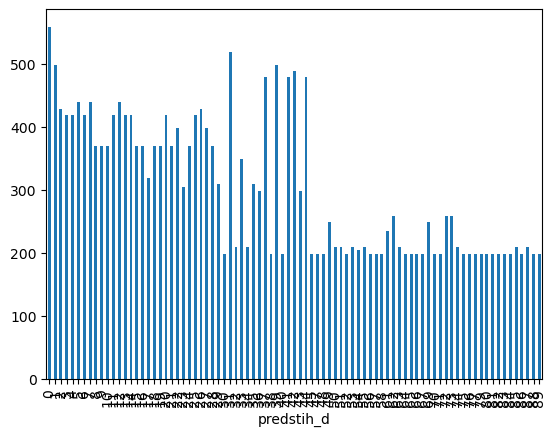

In [240]:
df[df['prodejce'].isin(['RJ','LE'])].groupby('predstih_d')['cena'].median().plot.bar()

<Axes: xlabel='predstih_d'>

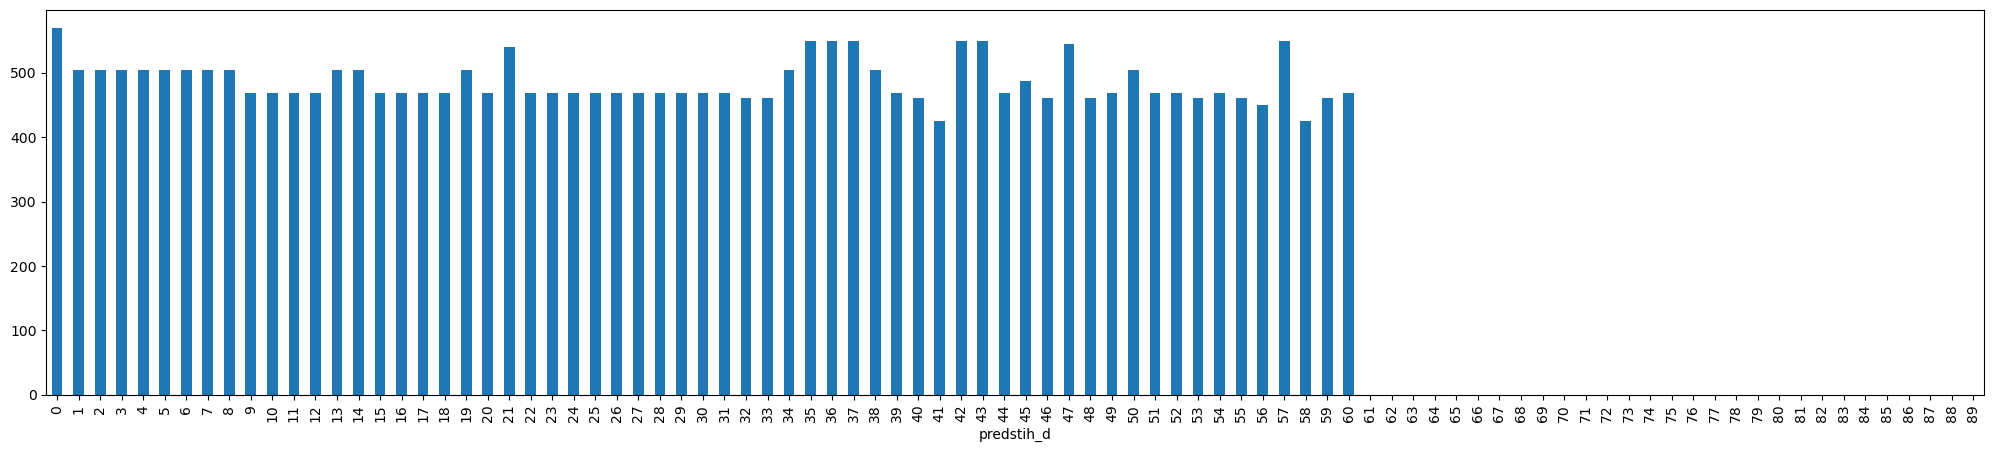

In [241]:
df[df['prodejce'] == 'ČD'].groupby('predstih_d')['cena'].median().plot.bar(figsize=(25,5))

<Axes: xlabel='predstih_d'>

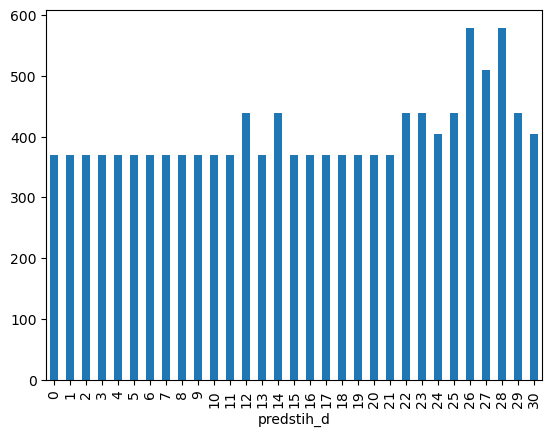

In [242]:
df[df['prodejce'] == 'RJ'].groupby('predstih_d')['cena'].median().plot.bar()

<Axes: xlabel='predstih_d'>

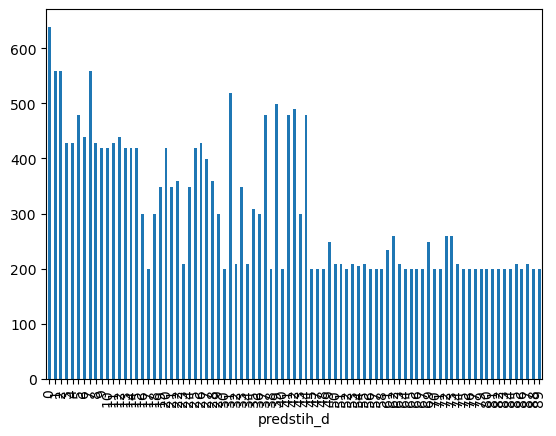

In [243]:
df[df['prodejce'] == 'LE'].groupby('predstih_d')['cena'].median().plot.bar()

In [244]:
df[df['volnych_mist'] == 0].groupby('spoj')['predstih_d'].median().sort_values()

spoj
RJ pá 11:50     0.0
RJ čt 14:53     0.0
RJ ne 10:53     0.0
RJ pá 16:53     0.0
RJ so 10:53     0.0
RJ st 06:52     0.0
RJ ne 18:53     0.0
RJ ne 16:50     0.0
RJ pá 09:50     0.0
RJ ne 17:50     0.0
RJ čt 17:50     1.0
RJ ne 16:53     1.5
RJ čt 16:50     2.0
RJ pá 13:50     2.0
RJ pá 16:50     2.0
RJ pá 15:50     2.0
RJ ne 13:50     2.5
RJ pá 07:53     3.0
RJ pá 14:53     4.0
RJ ne 14:53     4.0
RJ pá 10:53     5.0
RJ ne 12:53     5.5
RJ so 14:50     6.0
RJ pá 14:50     6.0
RJ ne 07:50     7.0
RJ čt 14:50     7.0
RJ ne 14:50     7.0
RJ po 07:50     8.0
RJ po 14:50     9.0
RJ čt 12:53    10.0
RJ út 08:53    10.0
RJ pá 12:53    10.0
RJ pá 08:53    10.0
RJ so 08:53    10.0
RJ čt 08:53    11.0
RJ st 08:53    11.5
RJ po 12:53    13.0
RJ čt 07:50    13.0
RJ so 07:50    13.0
RJ ne 08:53    15.0
RJ st 14:50    16.0
RJ st 12:53    17.0
RJ so 12:53    20.5
Name: predstih_d, dtype: float64

In [245]:
df[df['volnych_mist'] == 0].groupby('spoj')['predstih_d'].max().sort_values()

spoj
RJ ne 17:50     0
RJ pá 09:50     0
RJ st 06:52     0
RJ ne 18:53     0
RJ pá 16:53     0
RJ pá 11:50     0
RJ so 10:53     0
RJ čt 14:53     0
RJ ne 16:50     1
RJ ne 10:53     1
RJ čt 17:50     1
RJ pá 13:50     3
RJ čt 16:50     3
RJ pá 16:50     4
RJ pá 15:50     4
RJ ne 16:53     5
RJ pá 14:53     5
RJ ne 13:50     5
RJ pá 07:53     6
RJ so 14:50     7
RJ ne 14:53     8
RJ pá 10:53    11
RJ čt 07:50    13
RJ po 12:53    14
RJ st 08:53    14
RJ so 07:50    15
RJ st 12:53    17
RJ po 14:50    18
RJ po 07:50    18
RJ čt 14:50    18
RJ st 14:50    19
RJ pá 14:50    19
RJ ne 08:53    19
RJ ne 14:50    21
RJ ne 07:50    21
RJ čt 12:53    23
RJ so 12:53    23
RJ út 08:53    24
RJ čt 08:53    26
RJ so 08:53    27
RJ pá 12:53    27
RJ pá 08:53    27
RJ ne 12:53    28
Name: predstih_d, dtype: int64

<Axes: xlabel='predstih_d'>

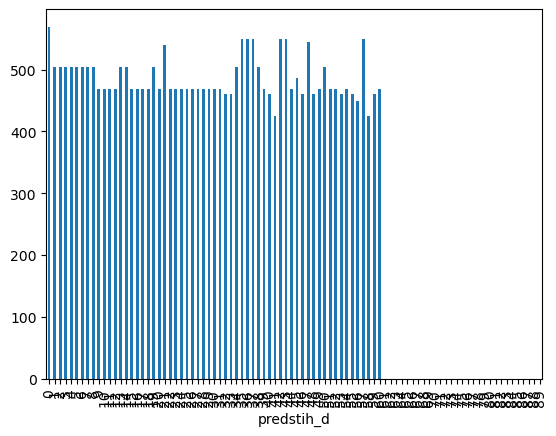

In [246]:
df[df['prodejce'] == 'ČD'].groupby('predstih_d')['cena'].median().plot.bar()

In [247]:
df[df['prodejce'] == 'RJ'][['predstih_h','predstih_d','cena','volnych_mist']].corr()

,predstih_h,predstih_d,cena,volnych_mist
predstih_h,1.000000,0.998513,0.039641,0.179279
predstih_d,0.998513,1.000000,0.038581,0.179339
cena,0.039641,0.038581,1.000000,-0.644018
volnych_mist,0.179279,0.179339,-0.644018,1.000000


In [248]:
df[df['prodejce'] == 'LE'][['predstih_h','predstih_d','cena','volnych_mist']].corr()

,predstih_h,predstih_d,cena,volnych_mist
predstih_h,1.000000,0.999894,-0.422548,0.667913
predstih_d,0.999894,1.000000,-0.422124,0.667695
cena,-0.422548,-0.422124,1.000000,-0.726625
volnych_mist,0.667913,0.667695,-0.726625,1.000000


<Axes: xlabel='predstih_d'>

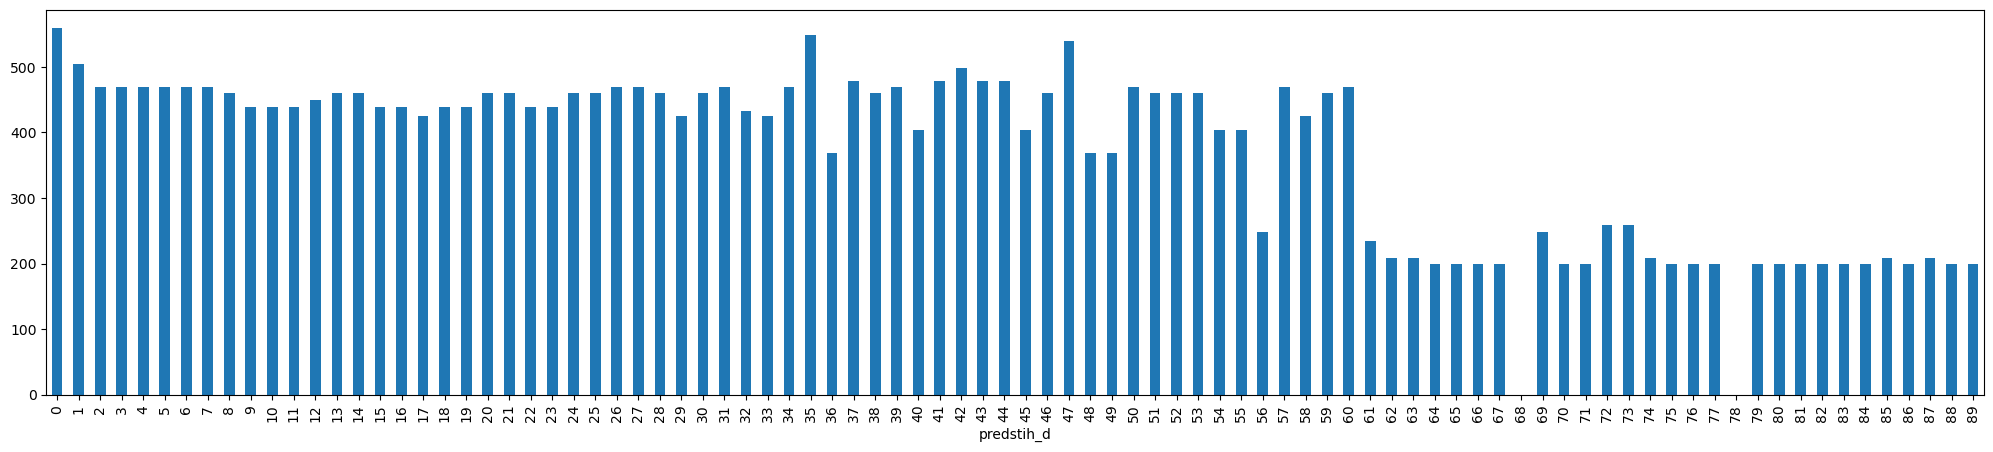

In [249]:
df.drop_duplicates(subset=['odjezd','odkud','kam','predstih_d'], keep='last').groupby('predstih_d')['cena'].median().plot.bar(figsize=(25,5))

In [250]:
df[['spoj','predstih_d','cena']].sort_values(by='cena').head(400)

,spoj,predstih_d,cena
237193,LE út 08:58,58,99.0
280074,LE st 07:58,50,99.0
202316,LE ne 08:58,56,99.0
280075,LE st 07:58,50,99.0
334418,LE ne 08:58,53,99.0
334415,LE ne 07:58,53,99.0
334414,LE ne 07:58,53,99.0
334413,LE ne 08:58,53,99.0
280073,LE st 08:58,50,99.0
334406,LE út 18:57,27,99.0


In [251]:
df[df['prodejce'] == 'ČD']['vlaky']

70         [EC 115 Cracovia]
71         [EC 143 Ostravan]
72        [SC 507 Pendolino]
73          [EC 117 Silesia]
74        [SC 505 Pendolino]
                 ...        
542090     [IC 549 Ostravan]
542093     [EC 115 Cracovia]
542094     [IC 547 Ostravan]
542095    [SC 513 Pendolino]
542096     [EC 141 Ostravan]
Name: vlaky, Length: 40473, dtype: object

<Axes: xlabel='odjezd'>

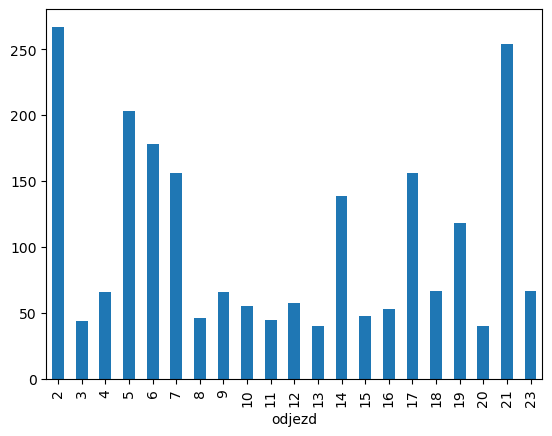

In [253]:
df.groupby(df['odjezd'].dt.hour)['volnych_mist'].median().plot.bar()

<Axes: xlabel='odjezd'>

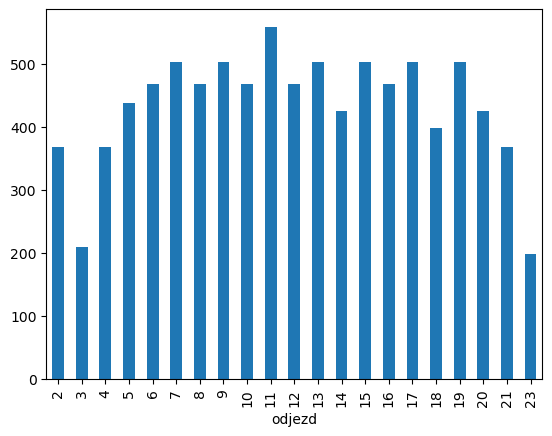

In [255]:
df.groupby(df['odjezd'].dt.hour)['cena'].median().plot.bar()

In [259]:
def obdobi(radek):
    return f"""{radek['odjezd'].dayofweek + 1}-{radek['odjezd'].hour // 4}"""

In [261]:
df['obdobi'] = df.apply(lambda row: obdobi(row), axis=1)

In [262]:
df[(df['predstih_h'] <= 4) & (df['prodejce'].isin(['RJ','LE']))].groupby('obdobi')['volnych_mist'].quantile(0.25).nsmallest(20)

obdobi
7-3     1.00
7-4     5.00
5-2     7.00
5-3     7.00
5-1    11.00
5-4    18.00
4-3    19.50
4-4    26.00
7-2    26.00
3-2    28.00
5-5    28.00
7-5    29.00
6-2    29.75
3-3    30.00
1-0    31.00
4-2    31.00
6-1    31.00
1-3    32.00
3-1    32.50
4-5    32.50
Name: volnych_mist, dtype: float64

In [265]:
spicka = ['5-1','5-2','5-3','5-4','7-3','7-4']

In [271]:
df['predstih_24h'] = df['predstih_h'] / 24

<Axes: xlabel='predstih_24h', ylabel='cena'>

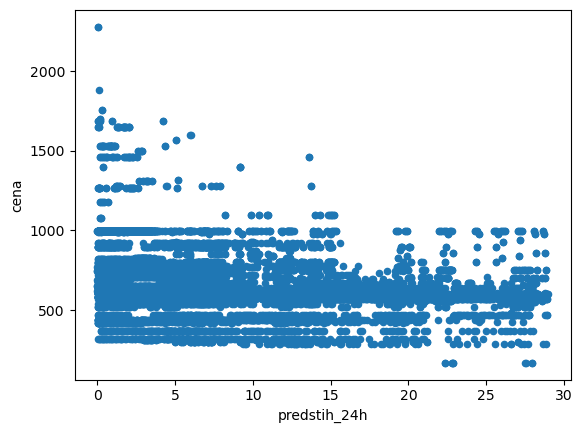

In [273]:
df[df['obdobi'].isin(spicka) & (df['predstih_d'] <= 28)].plot.scatter(x='predstih_24h',y='cena')

In [279]:
df.sort_values(by="cena",ascending=False)

,oscrapovano,prodejce,odkud,kam,odjezd,predstih,predstih_d,predstih_h,cena,prostredek,volnych_mist,obsazenost,jizdni_doba,vzdalenost,zpozdeni,cena_poznamka,den,prestupy,vlaky,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium,spoj,obdobi,predstih_24h
520294,2024-11-17 12:12:56,LE,Praha hl.n.,Ostrava-Svinov,2024-11-17 13:00:00,0 days 00:47:04,0,0.784444,2279.0,None,1.0,None,204.0,351.0,None,None,ne,0,[LE1259],None,None,0.0,0.0,0.0,1.0,LE ne 13:00,7-3,0.032685
520295,2024-11-17 12:12:56,LE,Praha hl.n.,Ostrava hl.n.,2024-11-17 13:00:00,0 days 00:47:04,0,0.784444,2279.0,None,1.0,None,211.0,356.0,None,None,ne,0,[LE1259],None,None,0.0,0.0,0.0,1.0,LE ne 13:00,7-3,0.032685
436363,2024-11-15 10:11:51,LE,Praha hl.n.,Ostrava-Svinov,2024-11-15 13:00:00,0 days 02:48:09,0,2.802500,1879.0,None,1.0,None,204.0,351.0,None,None,pá,0,[LE1259],None,None,0.0,0.0,1.0,0.0,LE pá 13:00,5-3,0.116771
237056,2024-11-10 08:15:54,LE,Praha hl.n.,Ostrava-Svinov,2024-11-10 15:00:00,0 days 06:44:06,0,6.735000,1759.0,None,4.0,None,204.0,351.0,None,None,ne,0,[LE1261],None,None,0.0,0.0,3.0,1.0,LE ne 15:00,7-3,0.280625
237055,2024-11-10 08:15:54,LE,Praha hl.n.,Ostrava hl.n.,2024-11-10 15:00:00,0 days 06:44:06,0,6.735000,1759.0,None,4.0,None,211.0,356.0,None,None,ne,0,[LE1261],None,None,0.0,0.0,3.0,1.0,LE ne 15:00,7-3,0.280625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542090,2024-11-17 23:59:53,ČD,Praha hl.n.,Ostrava hl.n.,2025-01-22 20:22:00,65 days 20:22:07,65,1580.368611,NaN,vlak,NaN,[Předpokládané nízké obsazení],206.0,356.0,[0],None,st,0,[IC 549 Ostravan],None,None,NaN,NaN,NaN,NaN,ČD st 20:22,3-5,65.848692
542093,2024-11-17 23:59:53,ČD,Praha hl.n.,Ostrava hl.n.,2025-01-22 10:22:00,65 days 10:22:07,65,1570.368611,NaN,vlak,NaN,[Předpokládané střední obsazení - doporučujeme...,206.0,356.0,[0],None,st,0,[EC 115 Cracovia],None,None,NaN,NaN,NaN,NaN,ČD st 10:22,3-2,65.432025
542094,2024-11-17 23:59:53,ČD,Praha hl.n.,Ostrava hl.n.,2025-01-22 18:22:00,65 days 18:22:07,65,1578.368611,NaN,vlak,NaN,[Předpokládané nízké obsazení],211.0,356.0,[0],None,st,0,[IC 547 Ostravan],None,None,NaN,NaN,NaN,NaN,ČD st 18:22,3-4,65.765359
542095,2024-11-17 23:59:53,ČD,Praha hl.n.,Ostrava-Svinov,2025-01-23 16:31:00,66 days 16:31:07,66,1600.518611,NaN,vlak,NaN,[Předpokládané nízké obsazení],184.0,351.0,[0],None,čt,0,[SC 513 Pendolino],None,None,NaN,NaN,NaN,NaN,ČD čt 16:31,4-4,66.688275


<Axes: xlabel='predstih_24h', ylabel='cena'>

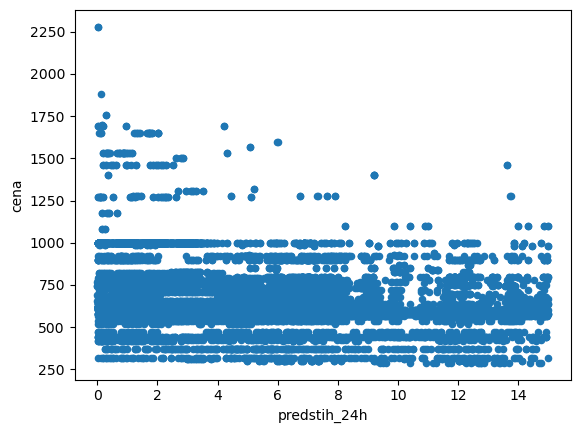

In [275]:
df[df['obdobi'].isin(spicka) & (df['predstih_d'] <= 14)].plot.scatter(x='predstih_24h',y='cena')

In [269]:
df[df['predstih_h'] <= 24]['cena'].median()

559.0